<a href="https://colab.research.google.com/github/NAGPALADITI14/Data_Mining/blob/main/DecisonTreeAndBayesTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

data=pd.read_csv("/content/Heart_health.csv")

drop_cols = ['ID','Name']
data=data.drop(columns=[col for col in drop_cols if col in data.columns],errors='ignore')

label_encoder ={}
for col in ['Gender','Smoker']:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])
  label_encoder[col]=le

data['Blood Pressure(mmHg)'] = data['Blood Pressure(mmHg)'].astype(str).str.split('/').str[0].astype(float)

display(data.head())
X = data.drop('Heart Attack',axis=1)
target = data['Heart Attack']

X_train,X_test,y_train,y_test=train_test_split(X,target,test_size=0.3,random_state=43)

,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,45,1,175,80,120.0,200,90,0,3,0
1,35,0,160,65,110.0,180,80,0,2,0
2,55,1,180,85,130.0,220,95,1,4,1
3,40,0,165,70,115.0,190,85,0,3,0
4,50,1,170,75,125.0,210,92,1,2,1


In [ ]:
# Here we have created the instance of decision tree classifier and we are training the data on it
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9954128440366973


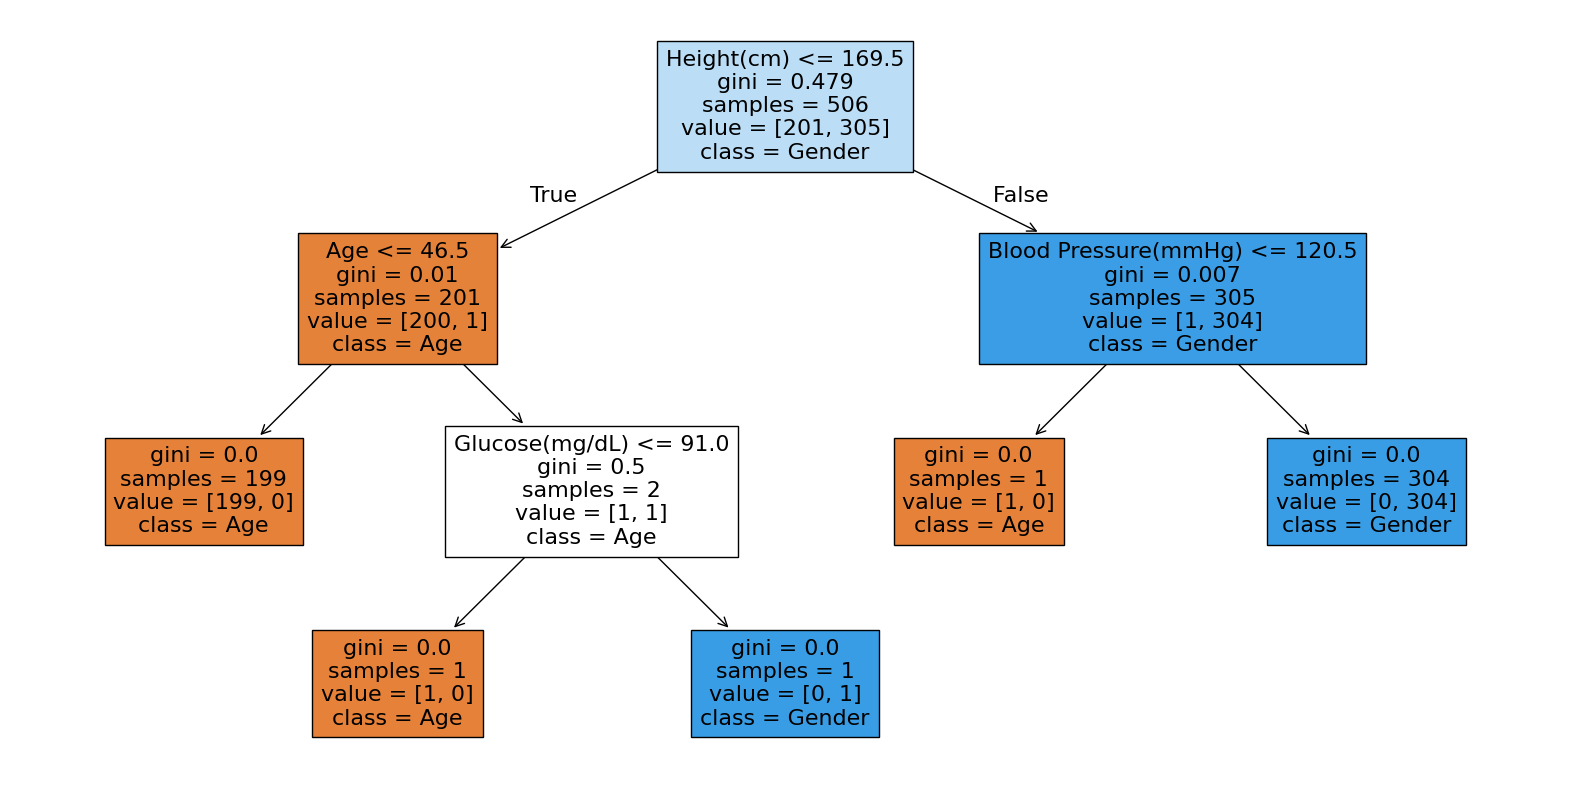

In [ ]:
from sklearn.tree import plot_tree

# Visualize the Decision Tree using Matplotlib
plt.figure(figsize=(20,10))
class_names = data.columns.to_list()
plot_tree(classifier, filled=True, feature_names=data.columns.tolist(),class_names=class_names)
plt.show()

# **Naive Bayes Theorem**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model=GaussianNB()
model.fit(X_train,y_train)

train_prediction = model.predict(X_train)
print('Target on train data \n',train_prediction)

train_accuracy=accuracy_score(y_train,train_prediction)
print('accuracy_score on train dataset : ', train_accuracy)
print("\n")
test_prediction = model.predict(X_test)
print('Target on test data \n',test_prediction)

test_accuracy=accuracy_score(y_test,test_prediction)
print('accuracy_score on test dataset : ', test_accuracy)

Target on train data 
 [1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1
 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0
 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1
 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1
 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1
 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1
 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1
 0

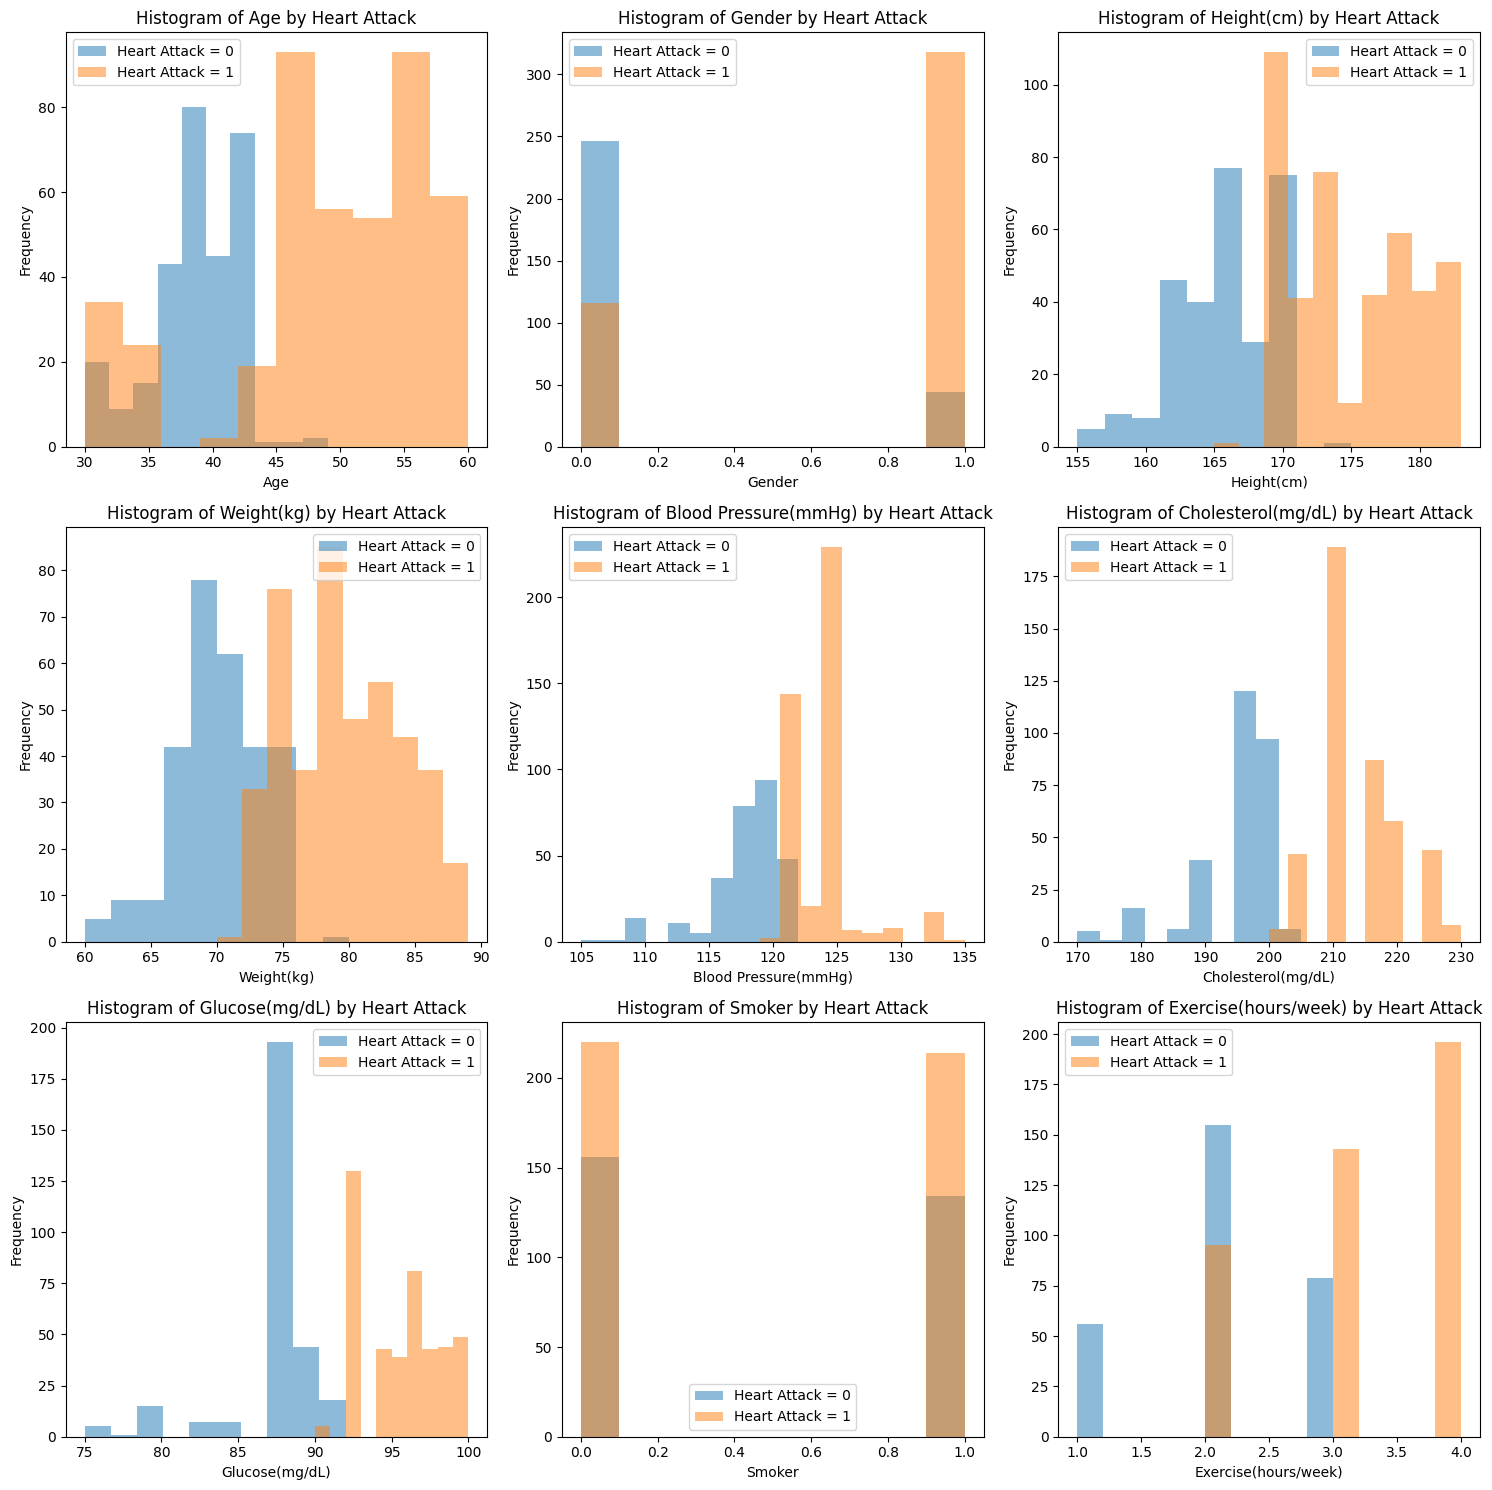

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_histograms(data, target_column='Heart Attack'):

    numerical_features = data.select_dtypes(include=['number']).columns.tolist()
    numerical_features.remove(target_column)

    num_features = len(numerical_features)
    rows = (num_features + 2) // 3
    cols = min(num_features, 3)

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, feature in enumerate(numerical_features):
        ax = axes[i]
        for category in data[target_column].unique():
            ax.hist(data[data[target_column] == category][feature],
                    alpha=0.5, label=f'{target_column} = {category}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Histogram of {feature} by {target_column}')
        ax.legend()

    for j in range(num_features, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_feature_histograms(data)